In [27]:
from collections import defaultdict
import numpy as np
from itertools import product
from scipy.special import gamma
from scipy.spatial.distance import pdist, squareform, euclidean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint

from functions_for_clustering import *

In [48]:
df = pd.read_csv('data/part_0.csv')
df.head(-1)

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-275,-276,-277,-278,-279,-280,-281,-282,-283,-284
0,000001.SS,243.0,2021-02-19,1.0,0.979912,0.960347,0.910541,0.841968,0.807106,0.812443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000002.SS,242.0,2021-02-19,1.0,0.979962,0.960403,0.910585,0.842046,0.807224,0.812541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000019.SZ,45.0,2020-04-24,1.0,0.819562,0.655986,0.507589,0.372681,0.246206,0.229342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000020.SZ,95.0,2020-07-10,1.0,0.835148,0.807154,0.720062,0.665630,0.606532,0.552100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000020.SZ,238.0,2021-02-05,0.0,0.018663,0.041991,0.041991,0.041991,0.068429,0.125972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,1K2.BE,178.0,2020-11-02,0.0,0.229788,0.275362,0.273881,0.271602,0.270805,0.272628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11146,1K4.F,86.0,2020-06-25,0.0,0.003555,0.003555,0.024882,0.046209,0.167064,0.167064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11147,1K5.F,156.0,2020-10-01,0.0,0.053628,0.053628,0.053628,0.066021,0.008562,0.014196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11148,1K5.F,289.0,2021-04-14,1.0,0.954935,0.909869,0.954935,0.833258,0.842271,0.837765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.columns

Index(['Ticker', 'index', 'Date', 'extremum', '-1', '-2', '-3', '-4', '-5',
       '-6',
       ...
       '-275', '-276', '-277', '-278', '-279', '-280', '-281', '-282', '-283',
       '-284'],
      dtype='object', length=288)

In [49]:
df_temp = df.drop(labels=['Ticker', 'index', 'Date', 'extremum'], axis=1)

key1 = -50
key2 = min([int(x) for x in df_temp.columns])

df_temp = df_temp.drop(labels=[str(x) for x in list(range(key2,key1))], axis=1)
df_temp = df_temp.loc[df_temp.index < 300]
df_temp = df_temp.dropna(axis=0)

clustering_data = df_temp.values.tolist()
len(clustering_data)

234

In [5]:
df.head(1)

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-275,-276,-277,-278,-279,-280,-281,-282,-283,-284
0,000001.SS,243.0,2021-02-19,1.0,0.979912,0.960347,0.910541,0.841968,0.807106,0.812443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
clustering_result = get_clustering(clustering_data, 4, 1)
clustering_result

array([ 6,  6,  8,  1,  1,  8,  1,  1,  1,  8,  7,  1,  6,  1, 10,  7,  6,
        7,  7,  7,  8,  7,  7,  1,  1,  7,  7,  8,  8, 10,  7,  1,  7,  1,
       10,  1,  7,  7, 11,  1,  1,  1,  7,  8,  1,  7,  7,  1,  1,  6,  1,
        1, 11,  8,  7,  1,  1,  1,  1,  8, 11,  8, 11,  8,  7,  1,  9,  1,
        1,  8,  8,  1,  7,  8,  7,  7,  7,  1,  7,  1,  8,  7,  7,  1,  7,
        7, 10,  1,  1, 11, 10,  8,  1, 11,  8,  9,  1,  1,  8,  7,  7, 10,
        9, 11, 10,  8, 10,  1,  8,  8])

In [21]:
visualization_data = []
for i in range(len(clustering_result)):
    if clustering_result[i] == 1:
        visualization_data.append(clustering_data[i])

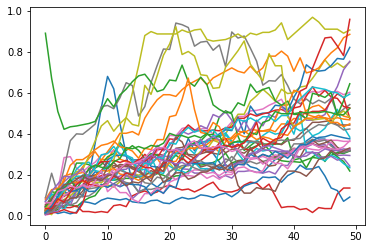

In [22]:
visualization_index = list(range(len(clustering_data[0])))
for i in visualization_data:
    sns.lineplot(y=i, x=visualization_index)

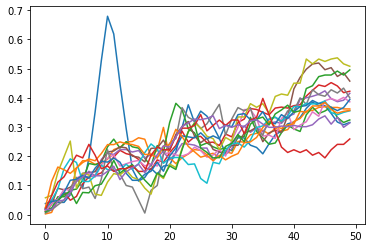

In [35]:
clustering_result = get_clustering(clustering_data, 2, 1)

visualization_data = []
for i in range(len(clustering_result)):
    if clustering_result[i] == max(set(clustering_result), key=list(clustering_result).count):
        visualization_data.append(clustering_data[i])
        
visualization_index = list(range(len(clustering_data[0])))
for i in visualization_data:
    sns.lineplot(y=i, x=visualization_index)

In [62]:
def get_cluster_grenze(w):
    n = len(w)
    ans = [0]*n
    for i in range(n-1):
        if w[i] != w[i+1]:
            ans[i+1] = i+1
    return ans

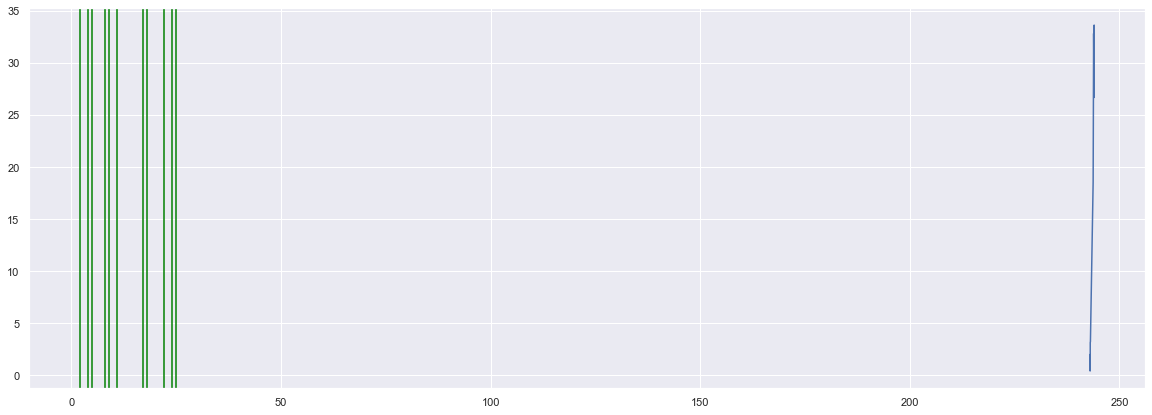

In [65]:
sns.set(rc={'figure.figsize':(20,7)})
c = []
for i in a:
    c.append(-i[0])
clusters = get_clustering(a, 4, 1)
#sns.scatterplot(y=clusters, x=c)
sns.lineplot(y=b, x=d)
for i in get_cluster_grenze(clusters):
    if i != 0:
        plt.axvline(i, 0,1, color="green")

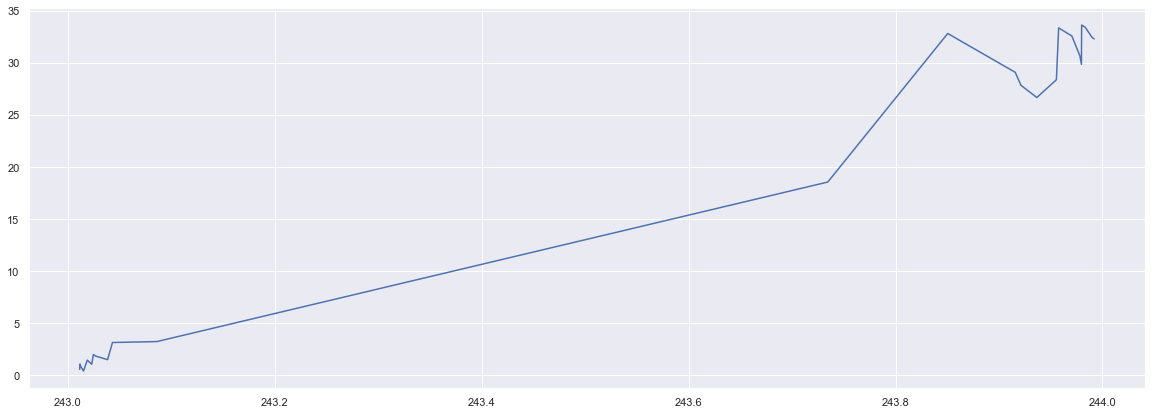

In [64]:
b = []
d = []
for i in a:
    b.append(35*i[1])
for i in a:
    d.append(i[0]+243)
sns.lineplot(y=b, x=d)

In [53]:
def generate_z_vector(arr, n): #arr - наш ряд, n - длина z-вектора
    z_vector = []
    for i in range(n):
        z_vector.append(randint(1, len(arr) // n))
    return z_vector


def generate_z_vector2(arr, n): #гнилой алгорит, выдает ошибку, а если не выдает, то значит резы хуйня полная
    z_vector = []
    random_range = len(arr)
    for i in range(n):
        x = randint(0, random_range)
        z_vector.append(x)
        random_range -= x
    return z_vector

arr = []
# for i in range(30): #создаем рандомную хуйню 
#     arr.append(randint(0, 100))
arr = clustering_data[0]
print(*arr)
z_vector = sorted(generate_z_vector_zaebalo(arr, 30))
print(z_vector)


0.9799120903567098 0.960347340181852 0.9105413805000082 0.8419678996891204 0.8071059195258194 0.812442617418665 0.8273550188431669 0.8431629184568772 0.8157486553387714 0.7943057155407582 0.8156444947599213 0.8814400459249176 0.8776648140851493 0.9305694331590724 0.913689056635076 0.9276986544904048 0.8908531458380069 0.8747216885890907 0.9035249165301424 0.8747198033297447 0.8742633349106668 0.9058725357303774 0.9152238933998956 0.8410518993045275 0.8783222982819631 0.8842054857276441 0.8597574425325818 0.8383288778370797 0.8135035471154586 0.7846531876907643 0.7280737268372324 0.6938873764919471 0.7115022971885123 0.7108054582028576 0.6785177996761123 0.6970574400817444 0.6724067315070195 0.7339774164782975 0.7092001598699924 0.7188267654039824 0.6822532054122021 0.6824916907194338 0.6843161504512367 0.6631489298325324 0.6883275110240539 0.6870613237159966 0.7239492507036727 0.7301501043491045 0.7571550305317749 0.7547949214883745
[0, 1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 18, 19, 21,

0 1 3 4 6 7 9 10 12 13 15 16 18 19 21 22 24 25 27 28 30 31 33 34 36 37 39 40 42 43 45 46 48 49
0.9799120903567098 0.960347340181852 0.8419678996891204 0.8071059195258194 0.8273550188431669 0.8431629184568772 0.7943057155407582 0.8156444947599213 0.8776648140851493 0.9305694331590724 0.9276986544904048 0.8908531458380069 0.9035249165301424 0.8747198033297447 0.9058725357303774 0.9152238933998956 0.8783222982819631 0.8842054857276441 0.8383288778370797 0.8135035471154586 0.7280737268372324 0.6938873764919471 0.7108054582028576 0.6785177996761123 0.6724067315070195 0.7339774164782975 0.7188267654039824 0.6822532054122021 0.6843161504512367 0.6631489298325324 0.6870613237159966 0.7239492507036727 0.7571550305317749 0.7547949214883745


<AxesSubplot:>

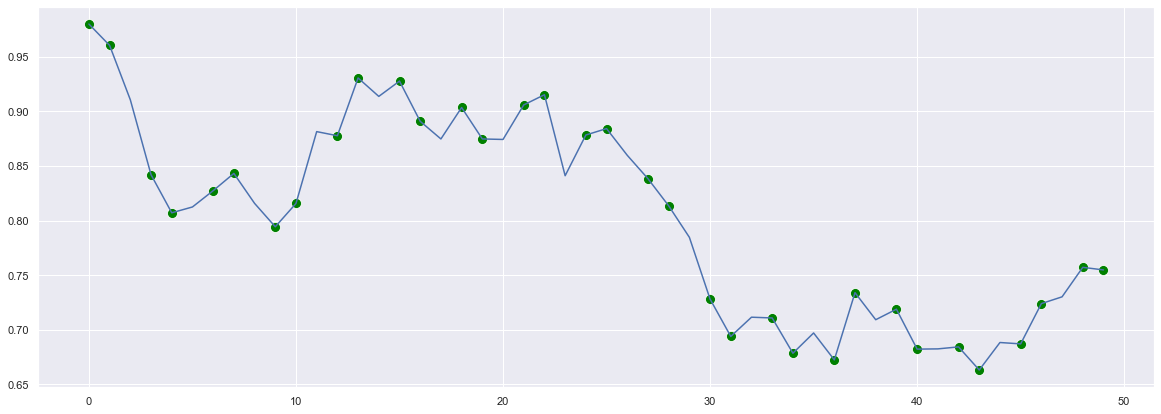

In [60]:
sns.set(rc={'figure.figsize':(20,7)})
arr = clustering_data[0]
z_vector = sorted(generate_z_vector_best(arr, 30))
axis2 = z_vector
'''
axis2 = []
axis2.append(z_vector[0])
for i in range(1, len(z_vector)):
    axis2.append(z_vector[i] + axis2[i - 1]) #вот тут самая залупа. короче прикол в том что эта з-залупа она аккомулитивная, короче значения которые лежат в z-vector они скалдываются, нахуя так костыльно - не ебу, но так написано так что хуй бы с ним
#в общем можешь открыть Fig.2 в той самой пдфке - там нормальный рисунок разберешься '''
print(*axis2)
values = []
for i in range(len(z_vector)):
    values.append(arr[axis2[i]]) #танцы с бубном
    
print(*values)
sns.scatterplot(x=axis2, y=values, color='green', s=100)

axis = list(range(len(arr)))
sns.lineplot(x=axis, y=arr)

In [17]:
borders = [i for i in range(len(arr)) if i % (len(arr) // len(z_vector)) == 0]
borders

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

58 85 6 17 51 19 23 97 80 30


<AxesSubplot:>

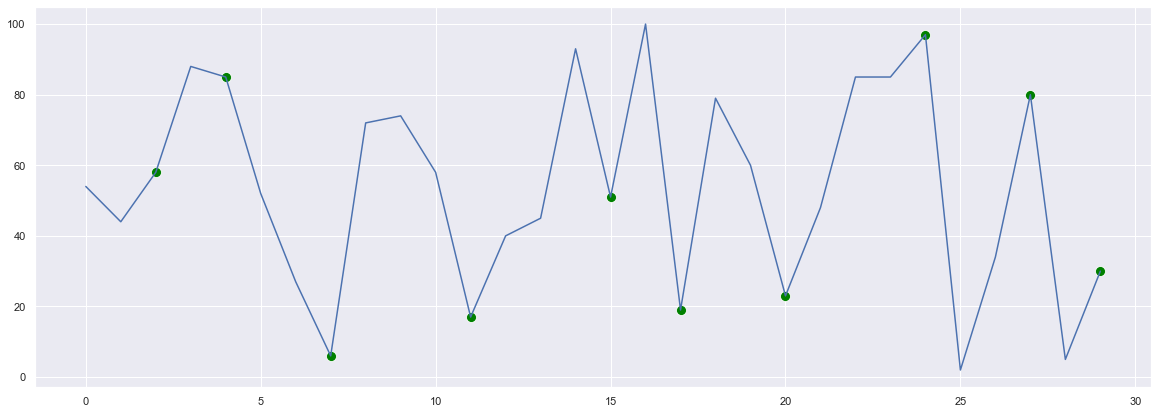

In [20]:
new_axis = []
for i in range(len(z_vector)):
    new_axis.append(z_vector[i] + borders[i])

new_values = [arr[i] for i in new_axis]
print(*new_values)
sns.scatterplot(x=new_axis, y=new_values, color='green', s=100)

sns.lineplot(x=axis, y=arr) #рандомные данные


In [58]:
#TODO: поделить ряд на n // 2 участке и на каждом участке брать min и max 
def generate_z_vector_best(arr, n):
    z_vector = []
    partition = (len(arr) * 2) // n
    for i in range(0,len(arr),partition):
        z_vector.append(index_element(arr, i, partition, "max"))
        z_vector.append(index_element(arr, i, partition, "min"))
    return z_vector
#я тут немного пошаманил и сделал дополнительную функцию чтобы наш говнокод выглядел хоть чуть-чуть получше
    

In [57]:
def index_element(arr, i, partition, identifier):
    if (identifier == "max"):
        return i+arr[i:i+partition-1].index(max(arr[i:i+partition-1]))
    else:
        return i+arr[i:i+partition-1].index(min(arr[i:i+partition-1]))